# Week 2 Part 1 Assignment Graph Visualization

## Instructions

### Graph Visualization

This week's assignment is to:

Load a graph database of your choosing from a text file or other source.  If you take a large network dataset from the web (such as from [Stanford Large Network Dataset Collection](https://snap.stanford.edu/data/)), please feel free at this point to load just a small subset of the nodes and edges.

Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.  You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. 
Use a visualization tool of your choice to display information. Use NetworkX directly or pyviz or another tool. You can try Gephi too if you like or Neo4j but you should get used to use the Python toolset.

Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up. You wll be showing your assignment in the meet-up but it always useful to have a recording.

This is the first assignment to be done in a Team. Put your notebook in GitHub and submit your assignment link by end of day on Sunday. 

## Library

In [38]:
import pandas as pd
import requests
import zipfile
import os
import io
import networkx as nx
import urllib.request
import matplotlib.pyplot as plt

## URL of files used

In [39]:
# URL of the zip file
url_govt = "https://nrvis.com/download/data/soc/fb-pages-government.zip"
url_stnfd = "https://snap.stanford.edu/data/soc-redditHyperlinks-body.tsv"

Download of file **fb-pages-government**
edge & node count with diameter

In [40]:
# Download the file
response = requests.get(url_govt)
if response.status_code == 200:
    with zipfile.ZipFile(io.BytesIO(response.content)) as thezip:
        # List all files in the zip
        print("Files in zip:", thezip.namelist())

        # Extract and read the specific file
        file_name = 'fb-pages-government.edges'  # Adjust this if needed
        with thezip.open(file_name) as file:
            edges_df = pd.read_csv(file, sep=' ', header=None, names=['source', 'target'])
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

Files in zip: ['fb-pages-government.edges', 'readme.html', 'fb-pages-government.nodes']


Create a graph from the edges

In [41]:
# Create a graph from the edges
G_govt = nx.from_pandas_edgelist(edges_df, 'source', 'target')
print(f"Graph has {G_govt.number_of_nodes()} nodes and {G_govt.number_of_edges()} edges.")

# Check if the graph is connected
if nx.is_connected(G_govt):
    # Compute the diameter
    diameter = nx.diameter(G_govt)
    print(f"The diameter of the graph is: {diameter}")
else:
    # Compute the diameter for the largest connected component
    largest_cc = max(nx.connected_components(G_govt), key=len)
    G_largest_cc = G_govt.subgraph(largest_cc).copy()
    diameter = nx.diameter(G_largest_cc)
    print(f"The diameter of the largest connected component is: {diameter}")

Graph has 178910 nodes and 89455 edges.
The diameter of the largest connected component is: 1


In [42]:
# centrality
dc_G_govt = nx.degree_centrality(G)

# Top 10 degree of centrality
dc_G_govt_df = pd.DataFrame({
    'Degree Centrality': dc_G_govt})

dc_G_govt_df.sort_values(by='Degree Centrality',
                                 ascending=False).head(10)

,Degree Centrality
"0,3630",0.000006
"2928,3938",0.000006
"2928,6032",0.000006
NaN,0.000006
"2928,3759",0.000006
NaN,0.000006
"2928,6927",0.000006
NaN,0.000006
"2928,4802",0.000006
NaN,0.000006


Plot a subset of the datasets nodes and edges

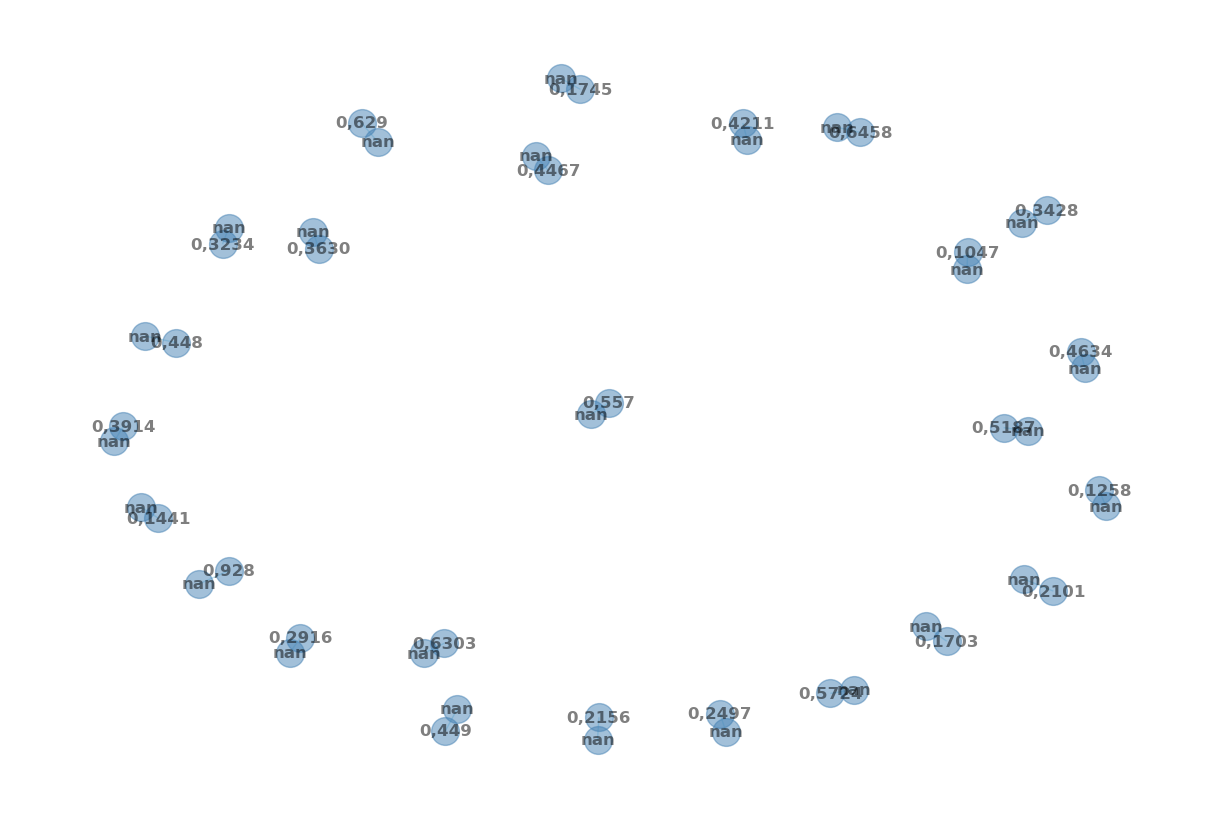

In [43]:
# Define the number of nodes and edges for the subset
num_nodes_subset = 50
num_edges_subset = 100

# Get a subset of the graph
subset_nodes = list(G_govt.nodes())[:num_nodes_subset]
subset_edges = list(G_govt.edges())[:num_edges_subset]

# Create a subgraph from the subset
G_subset = G_govt.subgraph(subset_nodes + subset_edges)

# Plot the subgraph
plt.figure(figsize=(12, 8))
nx.draw(G_subset, with_labels=True, node_color="steelblue", node_size=400, font_weight='bold', edge_color="skyblue", alpha=0.5)
plt.show()